In [3]:
# IMPORTS
from __future__ import division
import numpy as np
from numpy import random as npr
from matplotlib import pyplot as plt
from pprint import pprint

%matplotlib notebook

## Exercice 1

### 1) Generate n=500 samples from a Beta distribution with parameter (α,β)=(2,5). Display the histogram of this sample with 25 bins. Then, generate n=500 independent random vectors Xi , i=1,.,n in R2, where all coordinates are drawn independently from a Beta distribution with parameter (α,β)=(2,5). Compute the mean vector (in R²).

<IPython.core.display.Javascript object>


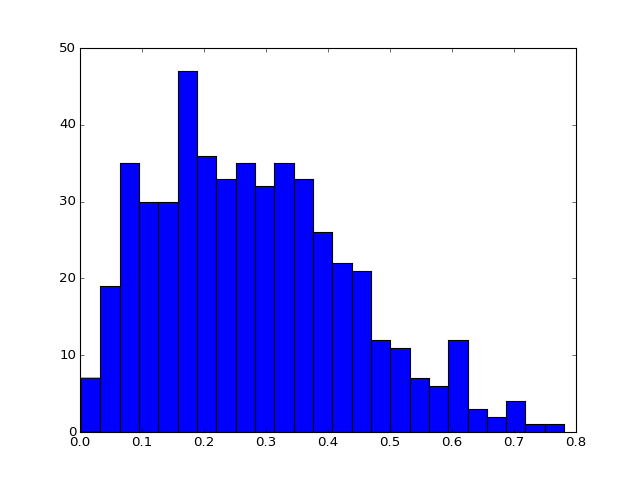

(0.28890099093532828, 0.28800478950581032)

In [4]:
(a, b) = (2, 5)
n = 500

samples = npr.beta(a, b, n)
plt.hist(samples, bins=25, label='Samples from Beta distribution')
plt.show()

beta1 = npr.beta(a, b, 500)
beta2 = npr.beta(a, b, 500)
r2_vectors = list(zip(beta1, beta2))

sample_mean = (beta1.mean(), beta2.mean())
sample_mean

### 2) Compute B=500 bootstrap estimators of the mean. On the same plot, represent the observed data, the mean and the 500 bootstrap estimators of the mean.


In [5]:
B = 500

bs_samples = []
bs_samples_mean = []
for _ in range(B):
    sample = []
    for i in npr.randint(0, n, n):
        sample.append(r2_vectors[i])
    bs_samples.append(sample)
    bs_samples_mean.append(map(lambda x: sum(x) / len(x), zip(*sample)))

<IPython.core.display.Javascript object>


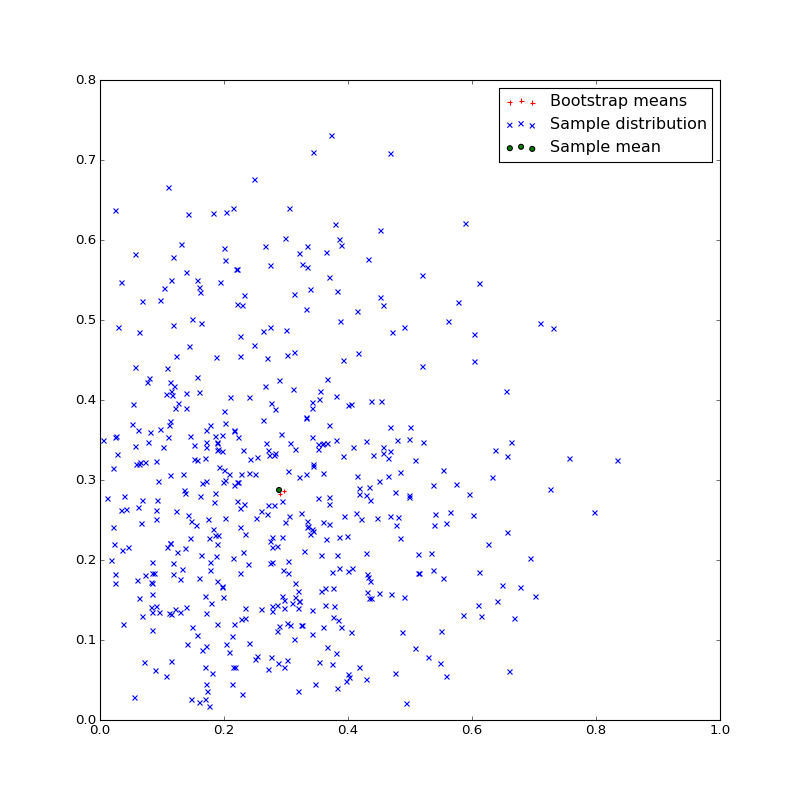

In [6]:
x = [m[0] for m in bs_samples_mean]
y = [m[1] for m in bs_samples_mean]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(x, y, c='r', marker='+', label='Bootstrap means')
ax.scatter(beta1, beta2, c='b', marker='x', label='Sample distribution')
ax.scatter(sample_mean[0], sample_mean[1], c='g', marker='o', label='Sample mean')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.legend(loc='upper right')
plt.show()


### 3) Give bootstrap estimates of the bias and the variance of the mean estimator.

In [10]:
bs_samples_mean_diff = [np.subtract(bs_sample_mean, sample_mean) for bs_sample_mean in bs_samples_mean]
print("Le biais de la moyenne vaut:", np.mean(bs_samples_mean_diff, axis=0))

bs_samples_mean_of_means = [np.mean(x), np.mean(y)]
bs_samples_mean_of_means
# var_vector = np.var(sample, axis=0)
# print(var_vector)
# bs_sample_var_diff = np.

('Le biais de la moyenne vaut:', array([-0.00020671,  0.00040205]))


[0.28869427758636684, 0.28840683529949879]